<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/cuaderno%201/energ%C3%ADa_y_potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Señales de Energía y Potencia

Ejercicio 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import *

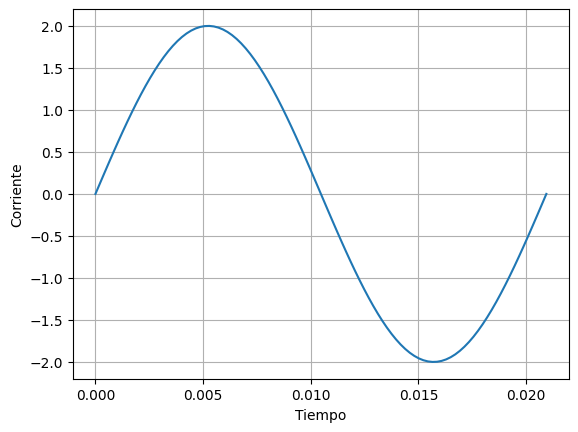

In [ ]:
w = 300
L = 0.01
R = 4
Imax = 2
T0 = 2*np.pi/w
N = 100

t = np.linspace(0, T0, N)
i = Imax*np.sin(w*t)
plt.xlabel('Tiempo')
plt.ylabel('Corriente')
plt.grid()
plt.plot(t,i)

In [ ]:
Vmax = np.sqrt((R**2)+((w*L)**2))*Imax
ang = np.arctan(w*L/R)

v = Vmax*np.sin(w*t + ang)

Text(0, 0.5, 'Amplitud')

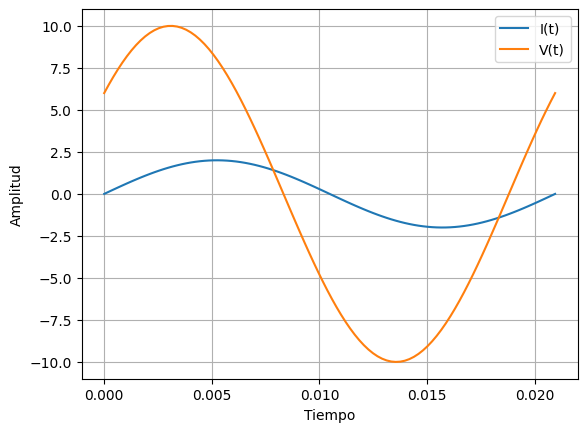

In [ ]:
plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

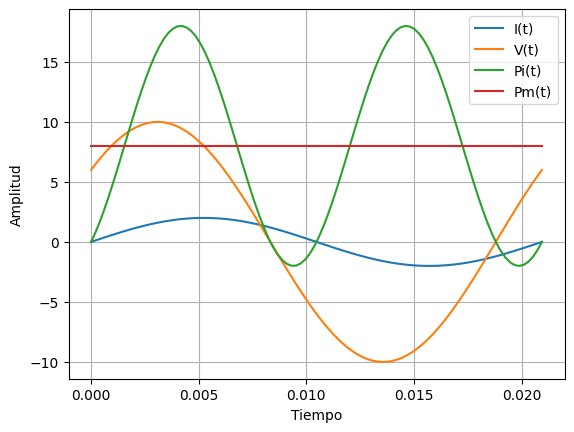

In [ ]:
pi = v*i
pm = np.trapz(pi, t)/T0

plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.plot(t, pi, label='Pi(t)')
plt.plot(t, pm*np.ones(len(t)), label='Pm(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

In [ ]:
C = 0.01
Vmax = np.sqrt((R**2)+(1/((w*C)**2)))*Imax
ang = -np.arctan(1/(w*C*R))

v = Vmax*np.sin(w*t + ang)

Text(0, 0.5, 'Amplitud')

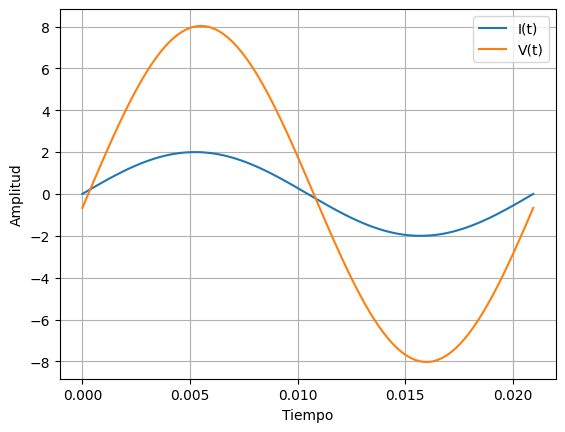

In [ ]:
plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

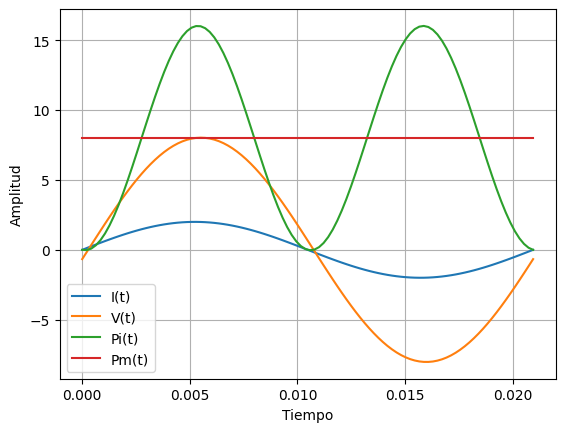

In [ ]:
pi = v*i
pm = np.trapz(pi, t)/T0

plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.plot(t, pi, label='Pi(t)')
plt.plot(t, pm*np.ones(len(t)), label='Pm(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

  Ejercicio 3
  
  

In [ ]:
t = symbols('t', Real = True) #definir la variable t
a = symbols('a', Real = True, nonzero = True, nonnegative = True) #a > 0 y diferente de 0
x = exp(-a*t)* t #función
E = integrate(x**2, (t, -oo, oo)) #integral
print('La energía total de la señal es:')
E

La energía total de la señal es:


oo

In [ ]:
#para hallar la potencia media
T = symbols("T", Real = True)
pm = limit(integrate(x**2, (t, -T/2, T/2)) / T, T, oo)
print('\nLa potencia media de la señal es:')
pm


La potencia media de la señal es:


oo

Ejercicio 4

In [ ]:
# Definir símbolos y señales
t, B, T =symbols("t B T ", Real=True)

parte1 = (1, (0 <= t) & (t <= T/4))
parte2 = (-1, (T/4 < t) & (t <= (3*T)/4))
parte3 = (1, ((3*T)/4 < t) & (t <= T))

x2 = sym.Piecewise(parte1, parte2, parte3)
Wo = 2*sym.pi/T
x1 = sym.cos(Wo*t)


In [ ]:
x1

cos(2*pi*t/T)

In [ ]:
x2

Piecewise((1, (t >= 0) & (t <= T/4)), (-1, (t <= 3*T/4) & (t > T/4)), (1, (T >= t) & (t > 3*T/4)))

In [ ]:
A = 1
x2 = A*(sym.Heaviside(t) - sym.Heaviside(t-T/4)) -  A*(sym.Heaviside(t-T/4) - sym.Heaviside(t-3*T/4)) +  A*(sym.Heaviside(t-3*T/4) - sym.Heaviside(t-T))
x2

Heaviside(t) - Heaviside(-T + t) + 2*Heaviside(-3*T/4 + t) - 2*Heaviside(-T/4 + t)

In [ ]:
#integrando las tres partes principales con sympy
P1 = (1/T)*sym.integrate(x1**2, (t, 0, T))
P3 = (1/T)*sym.integrate(A**2, (t, 0, T))
P2 = -(2/T)*(sym.integrate(x1*A, (t, 0, T/4))-sym.integrate(x1*A, (t, T/4,3*T/4))+sym.integrate(x1*A, (t, 3*T/4,T)))
P_ = P1 + P2 + P3
P_

1 - 2*(-Piecewise((-T/pi, (T > -oo) & (T < oo) & Ne(T, 0)), (T/2, True)) + 2*Piecewise((T/(2*pi), (T > -oo) & (T < oo) & Ne(T, 0)), (T/4, True)))/T + Piecewise((T/2, (T > -oo) & (T < oo) & Ne(T, 0)), (T, True))/T

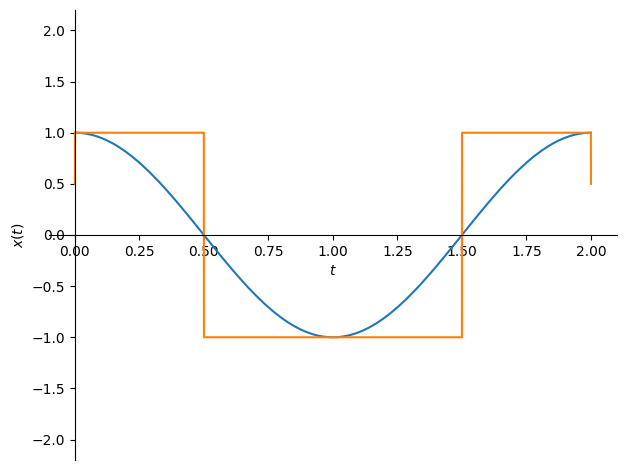

In [ ]:
#graficar señales con A, B y T predefinidos
p1 = sym.plot(x1.subs({B:1,T:2}), (t, 0, 2), ylim=[-2.2, 2.2], ylabel=r'$x(t)$', xlabel = '$t$', show=False);
p2 = sym.plot(x2.subs({A:1,T:2}), (t, 0, 2), ylim=[-2.2, 2.2], ylabel=r'$x(t)$',show=False);

p1.extend(p2)#se extiende los gráficos sobre una misma figura
p1.show()